In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")
df.head(5)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [4]:
df.shape

(103, 7)

## Data Cleaning

In [5]:
df['Production (Tons)'] =df['Production (Tons)'].str.replace(".",",")
df['Production per Person (Kg)'] =df['Production per Person (Kg)'].str.replace(".","").str.replace(",", ".")
df['Acreage (Hectare)'] =df['Acreage (Hectare)'].str.replace(".","")
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace(",",".")

In [6]:
df.head(5)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,"768,678,382",3668.531,10226205,75.167.5
1,1,India,Asia,"348,448,000",260721,4950000,70.393.5
2,2,China,Asia,"123,059,739",88287,1675215,73.459.1
3,3,Thailand,Asia,"87,468,496",1264.303,1336575,65.442.2
4,4,Pakistan,Asia,"65,450,704",324219,1130820,57.879


In [7]:
df.rename(columns= {"Production (Tons)":"Production_(Tons)"}, inplace=True)
df.rename(columns= {"Production per Person (Kg)":"Production_per_Person_(Kg)"}, inplace=True)
df.rename(columns= {"Acreage (Hectare)":"Acreage_(Hectare)"}, inplace=True)
df.rename(columns= {"Yield (Kg / Hectare)":"Yield_(Kg / Hectare)"}, inplace=True)

In [8]:
df.head()

,Unnamed: 0,Country,Continent,Production_(Tons),Production_per_Person_(Kg),Acreage_(Hectare),Yield_(Kg / Hectare)
0,0,Brazil,South America,"768,678,382",3668.531,10226205,75.167.5
1,1,India,Asia,"348,448,000",260721,4950000,70.393.5
2,2,China,Asia,"123,059,739",88287,1675215,73.459.1
3,3,Thailand,Asia,"87,468,496",1264.303,1336575,65.442.2
4,4,Pakistan,Asia,"65,450,704",324219,1130820,57.879


In [9]:
df.isnull().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production_(Tons)             0
Production_per_Person_(Kg)    0
Acreage_(Hectare)             1
Yield_(Kg / Hectare)          1
dtype: int64

In [10]:
df = df.dropna().reset_index()
df.head()

,index,Unnamed: 0,Country,Continent,Production_(Tons),Production_per_Person_(Kg),Acreage_(Hectare),Yield_(Kg / Hectare)
0,0,0,Brazil,South America,"768,678,382",3668.531,10226205,75.167.5
1,1,1,India,Asia,"348,448,000",260721,4950000,70.393.5
2,2,2,China,Asia,"123,059,739",88287,1675215,73.459.1
3,3,3,Thailand,Asia,"87,468,496",1264.303,1336575,65.442.2
4,4,4,Pakistan,Asia,"65,450,704",324219,1130820,57.879


In [11]:
df.drop(columns=['index','Unnamed: 0'], inplace=True)
df.head()

,Country,Continent,Production_(Tons),Production_per_Person_(Kg),Acreage_(Hectare),Yield_(Kg / Hectare)
0,Brazil,South America,"768,678,382",3668.531,10226205,75.167.5
1,India,Asia,"348,448,000",260721,4950000,70.393.5
2,China,Asia,"123,059,739",88287,1675215,73.459.1
3,Thailand,Asia,"87,468,496",1264.303,1336575,65.442.2
4,Pakistan,Asia,"65,450,704",324219,1130820,57.879


## Now let's work on Dtypes

In [12]:
df.dtypes

Country                       object
Continent                     object
Production_(Tons)             object
Production_per_Person_(Kg)    object
Acreage_(Hectare)             object
Yield_(Kg / Hectare)          object
dtype: object

In [13]:
df['Production_(Tons)'] = df['Production_(Tons)'].str.replace(',', '').astype(float)
df['Production_per_Person_(Kg)'] = df['Production_per_Person_(Kg)'].astype(float)
df['Acreage_(Hectare)'] = df['Acreage_(Hectare)'].astype(float)# 
df['Yield_(Kg / Hectare)'] = df['Yield_(Kg / Hectare)'].str.replace('.', '', 1).astype(float)

In [14]:
df.dtypes

Country                        object
Continent                      object
Production_(Tons)             float64
Production_per_Person_(Kg)    float64
Acreage_(Hectare)             float64
Yield_(Kg / Hectare)          float64
dtype: object

In [15]:
df.nunique()

Country                       102
Continent                       6
Production_(Tons)             102
Production_per_Person_(Kg)    101
Acreage_(Hectare)             101
Yield_(Kg / Hectare)          102
dtype: int64

##  UniVariate Analysis

In [16]:
df.head()

,Country,Continent,Production_(Tons),Production_per_Person_(Kg),Acreage_(Hectare),Yield_(Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### Q1. How many Countries produce sugarcane from each continent?

In [17]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

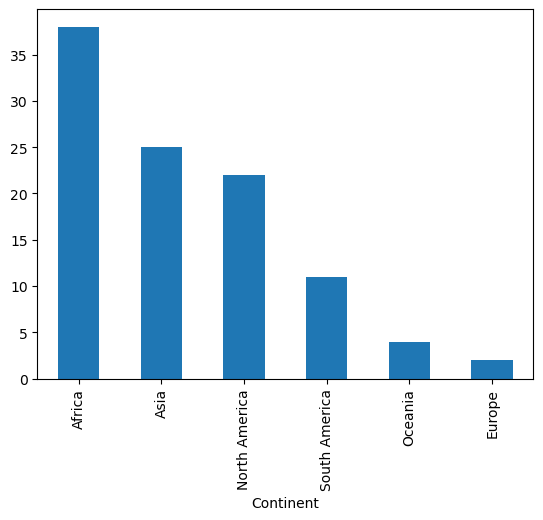

In [18]:
df["Continent"].value_counts().plot(kind= 'bar')

<Axes: >

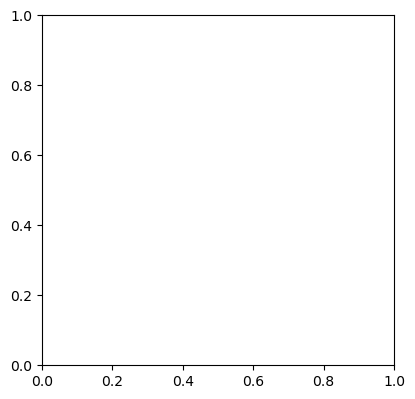

In [19]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)